In [1]:
import Nets.SiameseNet as sNet
import matplotlib.pyplot as plt
from scipy import misc
import tensorflow as tf
import numpy as np

In [2]:
page = misc.imread("page.png", mode="L")
def getFittingSize(imag,x,y,scale=1):
    return np.array(np.reshape(misc.imresize(imag[x:x+int(32*scale),y:y+int(32*scale)],(32,32)),(32,32,1)),dtype="float32")/255
def getScores(net,x1,x2,session):
    return session.run(net.y_pred,feed_dict={net.x1:x1,net.x2:x2})

In [3]:
test = getFittingSize(page,505,470,scale=3.5)
snips = [getFittingSize(page,i,j,scale=3.5) for i in range(0,4378-28,28) for j in range(0,2971-28,28)]
test = [test for i in range(128)]
mbSnips = [snips[i-128:i] for i in range(128,len(snips),128)]

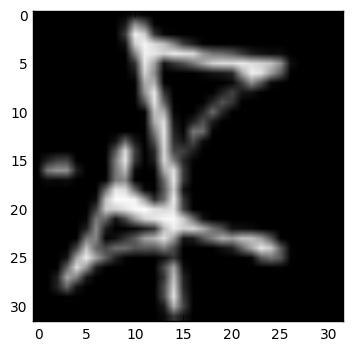

In [5]:
letters = ["Letter1.png","Letter1_2.png","Letter1_3.png","Letter2.png","Letter2_2.png","Letter2_3.png","Letter3.png","Letter3_2.png","Letter3_3.png"]
CuneiformGimps = [np.array(misc.imread("CuneiformImg/"+letters[i], mode="L"),dtype="float32") for i in range(len(letters))]
gimpPairX = [np.reshape(CuneiformGimps[i],(32,32,1))/255 for i in range(9) for j in range(9)]
gimpPairY = [np.reshape(CuneiformGimps[j],(32,32,1))/255 for i in range(9) for j in range(9)]
#print CuneiformGimps
plt.imshow(gimpPairY[8][:,:,0],cmap="Greys")
plt.show()

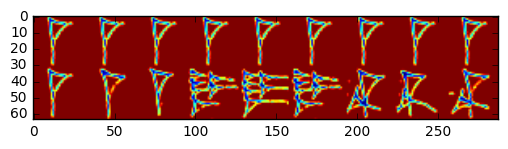

In [19]:
img = np.zeros((64,32*9))
s=0
for i in range(9):
    img[0:32,32*i:32*(i+1)]=gimpPairX[s*9+i][:,:,0]
    img[32:64,32*i:32*(i+1)]=gimpPairY[s*9+i][:,:,0]
plt.imshow(img)
plt.show()

16536

In [7]:
print len(mbSnips)

129


In [3]:
snips = [getFittingSize(page,i,j,scale=3.5) for i in range(0,4378-28,28) for j in range(0,2971-28,28)]
test = [test for i in range(128)]
mbSnips = [snips[i-128:i] for i in range(128,len(snips),128)]
net,saver = sNet.runInit()
with tf.Session() as sess:
    iterations=100000
    sNet.runRestore(sess,saver,"Nets/savedNets/SiameseBackup1_99999.ckpt")
    scores=[]
    for b in mbSnips:
        scores.extend(getScores(net,test,b,sess))

NameError: name 'test' is not defined

In [7]:
resh = 1-np.reshape(scores,(9,9))

In [9]:
print resh

[[  8.97041678e-01   6.06839895e-01   7.79245794e-01   1.81621313e-03
    5.35440445e-03   1.81621313e-03   7.84397125e-05   5.80698252e-03
    1.36297941e-03]
 [  6.06839895e-01   8.97041678e-01   6.71649456e-01   2.69412994e-05
    2.00092793e-04   2.69412994e-05   1.93119049e-05   4.89437580e-03
    9.79900360e-05]
 [  7.79245794e-01   6.71649456e-01   8.97041678e-01   1.74105167e-04
    4.36127186e-04   1.74105167e-04   1.19090080e-04   6.01619482e-03
    9.82522964e-04]
 [  1.81621313e-03   2.69412994e-05   1.74105167e-04   8.97041678e-01
    4.42489803e-01   8.97041678e-01   8.25241804e-02   1.07043982e-03
    3.95871401e-02]
 [  5.35440445e-03   2.00092793e-04   4.36127186e-04   4.42489803e-01
    8.97041678e-01   4.42489803e-01   5.07633090e-02   5.45525551e-03
    5.04020452e-02]
 [  1.81621313e-03   2.69412994e-05   1.74105167e-04   8.97041678e-01
    4.42489803e-01   8.97041678e-01   8.25241804e-02   1.07043982e-03
    3.95871401e-02]
 [  7.84397125e-05   1.93119049e-05   1.

In [7]:
z = zip(scores,snips)
sz = sorted(z, key=lambda x:x[0])

In [24]:
img = np.zeros((32,(32+4)*10))
s=200
for i in range(1,10):
    img[:,32*i+4*i:32*(i+1)+4*i]=sz[s+i][1][:,:,0]
img[:,0:32]=test[0][:,:,0]
plt.imshow(img,cmap="Greys")
misc.imsave("testComplete.png",img)
plt.show()

SyntaxError: invalid syntax (<ipython-input-24-8548e6e99e5f>, line 8)

In [13]:
len(sz)

16512

255.0


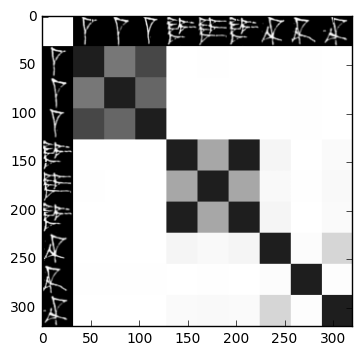

In [11]:
img = np.zeros((32*10,32*10))
for i in range(9):
    img[32*(i+1):32*(i+2),0:32]= CuneiformGimps[i]
    img[0:32,32*(i+1):32*(i+2)]= CuneiformGimps[i]
    
for i in range(9):
    for j in range(9):
        img[32*(i+1):32*(i+2),32*(j+1):32*(j+2)]=np.ones((32,32))*255*resh[i,j]
print img[40,30]
misc.imsave("SimilarityCunei.png",img)
plt.imshow(img,cmap="Greys")
plt.show()

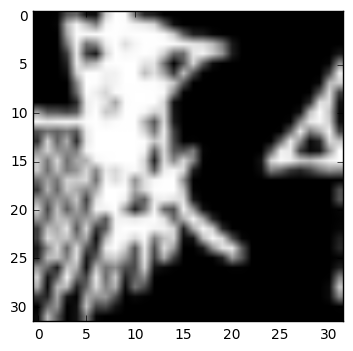

In [1]:
%matplotlib qt
import lib.SplitPage as splitP
reload(splitP)
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
px=64

In [2]:
imgs,scores,all_img,u_l_positions = splitP.run(px=px, page_Path="/home/jan/Desktop/Cuneiform/Data/pages/page-50.png")
page = misc.imread("/home/jan/Desktop/Cuneiform/Data/pages/page-50.png", mode="L")

9443


starting calculations


  0%|          | 0/3 [00:00<?, ?it/s]

restored


 33%|███▎      | 1/3 [00:03<00:07,  3.56s/it]

100%|██████████| 3/3 [00:03<00:00,  1.21s/it]


  0%|          | 0/268 [00:00<?, ?it/s]

 18%|█▊        | 48/268 [00:00<00:00, 479.18it/s]

 41%|████      | 110/268 [00:00<00:00, 513.03it/s]

 65%|██████▍   | 174/268 [00:00<00:00, 543.81it/s]

 89%|████████▉ | 239/268 [00:00<00:00, 569.44it/s]

100%|██████████| 268/268 [00:00<00:00, 598.89it/s]

calcs took 49.8072760105 seconds


In [3]:
oScore = np.copy(scores)
for i in range(len(all_img)):
    for j in range(len(all_img)):
        (x1,y1)=all_img[i].shape
        (x2,y2)=all_img[j].shape
        s=float(x1*y1)/(x2*y2)
        s=max(s,1/s)
        s=s-1
        if s>1:
            oScore[i,j]+=s

In [4]:
scoresBin = scores<0.01

In [5]:
def getClose(ind,scores):
    return [i for i in range(len(scores)) if scores[ind,i]]

In [6]:
c=getClose(0,scoresBin)

In [7]:
def show_sim(ind,scoresBin,imgs,px=32):
    c=getClose(ind,scoresBin)
    c.append(ind)
    im = np.zeros((px,px*(len(c))))
    for ind,val in enumerate(c):
        im[0:px,ind*px:(ind+1)*px] = imgs[val,:,:,0]

    plt.imshow(im,cmap="Greys")
    plt.show()

In [8]:
lens = [len(getClose(ind,scoresBin)) for ind in range(len(scoresBin))]

In [4]:
print scores

[[ 0.07067705  0.98933697  1.         ...,  1.          1.          0.99999988]
 [ 0.98933697  0.07067705  1.         ...,  1.          1.          1.        ]
 [ 1.          1.          0.07067705 ...,  1.          0.99999988
   0.99996722]
 ..., 
 [ 1.          1.          1.         ...,  0.07067705  0.99993801
   0.99999905]
 [ 1.          1.          0.99999988 ...,  0.99993801  0.07067705  1.        ]
 [ 0.99999988  1.          0.99996722 ...,  0.99999905  1.          0.07067705]]


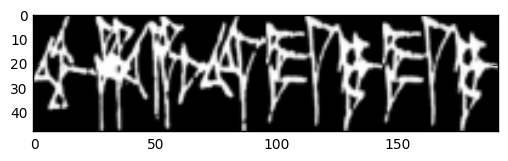

In [27]:
show_sim(-5,scoresBin,imgs,px=48)

In [27]:
from sklearn.cluster import AffinityPropagation as Aff
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering as Agg
from sklearn import metrics
#db = DBSCAN(eps=0.01,min_samples=4,metric='precomputed').fit(scores**0.5)
db = Agg(n_clusters=334,affinity="precomputed", linkage="average",compute_full_tree=True).fit(oScore)
#db = Aff(preference=-0.05,affinity='precomputed').fit(scoresBin)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

#print('Estimated number of clusters: %d' % n_clusters_)

In [22]:
print max(labels)
#print labels
print [list(labels).count(i) for i in range(max(labels)+1)]

49
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 535]


In [23]:
def showNum(ind,labels,imgs,plot=True,px=32):
    tShow = [imgs[i] for i in range(len(labels)) if labels[i]==ind]
    im = np.zeros((px,px*len(tShow)))
    for i in range(len(tShow)):
        im[:,px*i:px*(i+1)]= tShow[i][...,0]
    if plot:
        plt.imshow(im,cmap="Greys")
        plt.show()
    else:
        return im

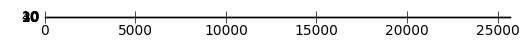

In [27]:
showNum(49,labels,imgs,px=px)

In [28]:
from scipy import misc
for i in range(49,50):
    misc.imsave("img/Clusters/Clusters_Fin/MetricCluster_Fin_test%s.png"%i,showNum(i,labels,imgs,False,px=px))

In [42]:
import skimage
import skimage.color
golden = (1 + 5 ** 0.5) / 2
def color_img(page,positions,all_img,labels):
    hsv_page = skimage.color.rgb2hsv(np.dstack((page,page,page)))
    for ind,img in enumerate(all_img):
        col = (golden*(labels[ind]+1))%1
        width,height = img.shape
        x_s,y_s = positions[ind]
        for x in range(width):
            for y in range(height):
                if img[x,y]!=1:
                    hsv_page[x_s+x,y_s+y,:]=[col,1,0.5]
    return skimage.color.hsv2rgb(hsv_page)

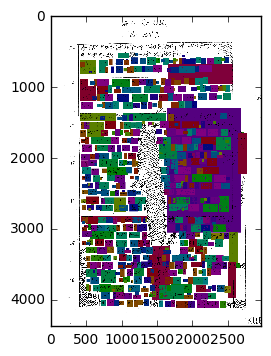

In [23]:
plt.imshow(color_img(page,u_l_positions,all_img,labels))
plt.show()

In [58]:
misc.imsave("col_test_metric_cluster_completeLinkage.png",color_img(page,u_l_positions,all_img,labels))

In [41]:
s=[i.shape for i in all_img]
x=sum([i[0] for i in s])/len(s)
y=sum([i[1] for i in s])/len(s)

In [44]:
print x
print y

90
98


In [53]:
big_img = [i for i in all_img if i.shape[0]>x*1.5]

In [54]:
len(big_img)

16

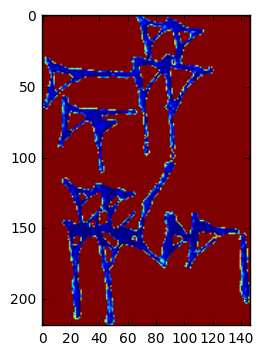

In [64]:
plt.imshow(big_img[9])
plt.show()

In [ ]:
s_img = big_img[9]

In [70]:
bin_s = 1*(s_img!=1)
nBin = np.zeros(bin_s.shape)
nBin[1:,:]+=bin_s[:-1,:]
nBin[:-1,:]+=bin_s[1:,:]
nBin[:,1:]+=bin_s[:,:-1]
nBin[:,:-1]+=bin_s[:,1:]

In [ ]:
n_img = s_img*(nBin>3)

In [ ]:
plt.imshow(n_img)
plt.show()

In [19]:
import scipy.cluster as sciCl

In [53]:
sVec = []
for i in range(len(oScore)-1):
    sVec.extend(oScore[i,i+1:])
Z=sciCl.hierarchy.linkage(sVec,method='single')

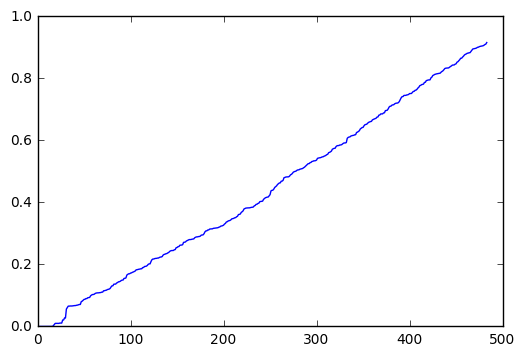

In [26]:
plt.plot(Z[:-100,2])
plt.show()

In [98]:
len(Z)

584

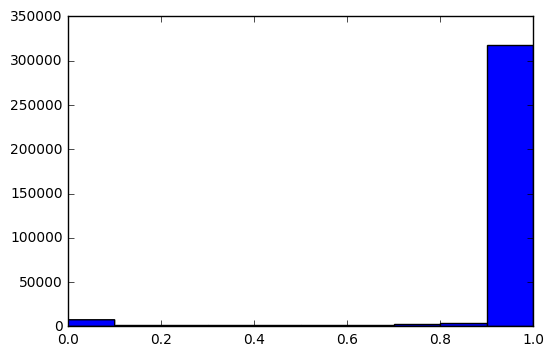

In [3]:
plt.hist(np.reshape(scores,(-1)))
plt.show()

In [3]:
from Evaluation import Evals as evals
reload(evals)
cScipy = evals.Clustering_Scipy(scores,method="complete")

In [4]:
labels = cScipy.get_clusters(0.75)

In [5]:
print len(labels)

268


In [6]:
print max(labels)
#print labels
count = [list(labels).count(i) for i in range(max(labels)+1)]
print count
labels2 = [i if count[i]>1 else max(labels)+1 for i in labels ]
labels2 = [i-min(labels2) for i in labels2]
count2 = [list(labels2).count(i) for i in range(max(labels2)+1)]
print count2
print len(count2)

130
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 10, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 14, 2, 3, 2, 2, 2, 8, 5, 2, 2, 11, 4, 4, 2, 3, 2, 5, 3, 3, 2, 3, 3, 3, 7, 2, 4, 3, 2, 3, 2, 2, 5, 3, 2, 9]
[3, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 10, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 14, 2, 3, 2, 2, 2, 8, 5, 2, 2, 11, 4, 4, 2, 3, 2, 5, 3, 3, 2, 3, 3, 3, 7, 2, 4, 3, 2, 3, 2, 2, 5, 3, 2, 9, 73]
59


In [ ]:
from scipy import misc
for i in range(302):
    misc.imsave("img/Clusters/Clusters_Sci/Cluster%s.png"%i,showNum(i,labels,imgs,False,px=px))

In [5]:
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
mds = manifold.MDS(n_components=2, metric=True)
nPos = mds.fit_transform(scores)

/usr/lib/python2.7/dist-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


In [7]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.models import *

output_file("index121.html")

source = ColumnDataSource(
        data=dict(
            x=nPos[:,0],
            y=nPos[:,1],
            desc=labels,
            color=[get_color(labels[i]) for i in range(268)],
            imgs = [
                'tempData/tempImg%s.png'%i for i in range(268)
            ]
        )
    )

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="42" alt="@imgs" width="42"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">Class: @desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )
TOOLS = 'box_zoom,box_select,crosshair,resize,reset'
p = figure(plot_width=400, plot_height=400, tools=[hover,BoxZoomTool(),CrosshairTool(),ResizeTool(),ResetTool()],
           title="Mouse over the dots")

p.circle('x', 'y', size=10, color='color', source=source)

show(p)

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nPos[:,0],nPos[:,1],nPos[:,2], c=labels)
plt.show()

In [51]:
plt.scatter(nPos[:,0],nPos[:,1],c=labels2)
plt.show()

In [10]:
import colorsys
def get_color(ind):
    def dec2hex(d):
        """return a two character hexadecimal string representation of integer d"""
        return "%02X" % d
    golden = (1 + 5 ** 0.5) / 2
    col = (golden*ind)%1
    hsv = [col,1,1]
    rgb = [255*i for i in colorsys.hsv_to_rgb(*hsv)]
    s="#"
    for i in rgb:
        s+=dec2hex(i)
    return s

In [1]:
%matplotlib qt
path = "/home/jan/Desktop/Cuneiform/savedNets/SiameseBackup4_Addition_fin2.ckpt"
#path = "/home/jan/Desktop/Cuneiform/savedNets/SiameseBackup4_2_fin.ckpt"
#path = "/home/jan/Desktop/Cuneiform/savedNets/SiameseMetricBackup2_240000.ckpt"
import Nets.SiameseNet as sNet
#import Nets.SiameseMetric as sNet
import tensorflow as tf
import time
import Evaluation.Evals as evalFunc
import matplotlib.pyplot as plt
from lib.loader import OmniGlotLoader as OLoader
load = OLoader(48)
#net,saver = sNet.runInit(sNet.backup2Net)
net,saver = sNet.runInit(sNet.backup4Net)
print "starting calculations"

with tf.Session() as sess:
    sNet.runRestore(sess, saver, path)
    evalFunc.incresed_perf(net,sess,load)
    #pred,truth = evalFunc.test_perf(net,sess,load,0,2)

In [3]:
imgs,all_img,u_l_positions = splitP.run(px=px,do_dist=False)

1291


In [20]:
color=[tuple([255*j for j in get_color(i)]) for i in range(268)]

In [21]:
print color

[(255, 0.0, 0.0), (0.0, 74.4079972126608, 255), (148.8159944253216, 255, 0.0), (255, 0.0, 223.2239916379824), (0.0, 255, 212.3680111493568), (255, 137.96001393669601, 0.0), (63.552016724035205, 0.0, 255), (10.855980488625594, 255, 0.0), (255, 0.0, 85.2639777012864), (0.0, 159.6719749139472, 255), (234.079972126608, 255, 0.0), (201.51203066073393, 0.0, 255), (0.0, 255, 127.10403344807041), (255, 52.69603623540689, 0.0), (0.0, 21.711960977251188, 255), (96.11995818990927, 255, 0.0), (255, 0.0, 170.5279554025728), (0.0, 244.93595261523632, 255), (255, 190.6560501721056, 0.0), (116.24805295944753, 0.0, 255), (0.0, 255, 41.84005574678402), (255, 0.0, 32.5679414658795), (0.0, 106.97593867853215, 255), (181.38393589119568, 255, 0.0), (254.20806689614082, 0.0, 255), (0.0, 255, 179.80006968347732), (255, 105.39207247081379, 0.0), (30.98407525816114, 0.0, 255), (43.423921954502376, 255, 0.0), (255, 0.0, 117.83191916716589), (0.0, 192.23991637981854, 255), (255, 243.35208640751796, 0.0), (168.944

In [4]:
wide_imgs = []
for img in all_img:
    if img.shape[1]>130:
        wide_imgs.append(img)

In [ ]:
print [img.shape[0] for img in imgs[0:50]]

In [11]:
plt.subplot(212)
plt.imshow(wide_imgs[2],cmap="Greys")
plt.show()

In [5]:
from lib.GraphCut import GraphCut as GC2

In [6]:
gc = GC2(1.5)
split= gc.calc_up_down(wide_imgs[2])

In [7]:
ls = [i[0] for i in split[0]]

In [8]:
rs = [i[1] for i in split[0]]

In [9]:
i2 = np.ones_like(wide_imgs[2])
print i2.shape
wImg = np.array(wide_imgs[2])
for ind in range(len(ls)):
    if type(ls[ind])==int and type(rs[ind])==int:
      i2[ls[ind],rs[ind]]=wImg[ls[ind]][rs[ind]]

(85, 416)


In [10]:
plt.imshow(i2,cmap="Greys")
plt.show()

In [2]:
%matplotlib qt
import lib.SplitPage as splitP
reload(splitP)
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
px=48

In [1]:
import lib.loader as load
loader = load.OmniGlotLoader(48)

In [1]:
import matplotlib as plt

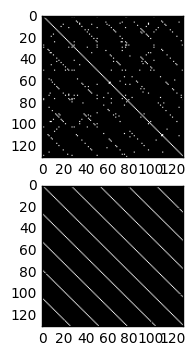

In [2]:
plt.subplot(211)
plt.imshow(pred>0.5, cmap="Greys")
plt.subplot(212)
plt.imshow(truth, cmap="Greys")
#plt.savefig("With_out.png")
plt.show()

In [2]:
pred.shape

(130, 130)

In [3]:
truth.shape

(130, 130)

In [7]:
sum(sum((pred-truth)**2))/(120*120)

0.029958756644386117

In [4]:
sum(sum((pred-truth)**2))/(120*120)

0.027272128640792582

In [11]:
float(sum(sum((pred>0.5) == truth)))/(130*130)

0.9727810650887574

In [3]:
float(sum(sum((pred>0.5) == truth)))/(130*130)

0.9688757396449704

In [4]:
sum(sum((pred-truth)**2))/(120*120)

0.028366910577478657

In [6]:
float(sum(sum((pred>0.5) == truth)))/(130*130)

0.970887573964497

In [ ]:
%matplotlib qt
import lib.SplitPage as splitP
reload(splitP)
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
px=64

In [1]:
import lib.loader as LoaderC
import lib.usefulFunctions as u_func
from Nets.NetCreator import NetCreator as NC
from Nets.netTest import netTest
from Nets.SiameseMetric import SiameseNetMetric as sNet
import tensorflow as tf

netCreator = NC(batch_size=128,px=64,netClass=sNet)
sess=tf.Session()
netCreator.loadNet(sess,"/home/jan/Desktop/Cuneiform/fold5/SiameseNetMetric_px64_enc600_Fin.ckpt")

path = u_func.getFolderPath()+"Data/Datasets/Dataset_Cuneiform"
load = LoaderC.CuneiformSetLoader(64,path)

nt = netTest(load,netCreator.net,sess)

Finished


In [6]:
import numpy as np
from collections import Counter
def calc_dist_mat_from_encs(self,session,encs,batchsize=128):
    arr=[]
    for symb in encs:
        x2 =[symb for i in range(batchsize)]
        tArr = []
        for i in range(0,len(encs),batchsize):
            tArr.extend(np.reshape(session.run(self.y_pred,feed_dict={self.enc1:encs[i:i+batchsize], self.enc2:x2[0:len(encs[i:i+batchsize])]}),(-1)))
        arr.append(tArr)
    return arr


def calc_dist_mat(self,session,x_in, batchsize=128):
    x1 = []
    for i in range(0, len(x_in), batchsize):
        x1.extend(session.run(self.enc1, feed_dict={self.x1: x_in[i:i + batchsize]}))

    return self.calc_dist_mat_from_encs(session,x1,batchsize)

def testKNN(self,k,n):
    self.dist = calc_dist_mat_from_encs(self.net,self.session,np.reshape(self.encs,(-1,600)),batchsize=128)
    correct=0
    incorrect=0
    for ind,row in enumerate(self.dist):
        row_w_num = zip(row,[i.ind for i in self.encClass])
        trueClass = row_w_num[ind][1]
        row_w_num = row_w_num[:ind]+row_w_num[ind+1:]
        row_w_num.sort(key=lambda x:x[0])
        classes = [i[1] for i in row_w_num[:k]]
        counted = Counter(classes)
        #print counted
        #counted[trueClass]-=1
        #print counted
        predClass = [i[0] for i in counted.most_common(n=n)]
        
        correct+=(trueClass in predClass)
        incorrect+=(trueClass not in predClass)

    return correct,incorrect

In [7]:
print [testKNN(nt,i,1) for i in range(8)]

[(0, 502), (422, 80), (393, 109), (398, 104), (384, 118), (380, 122), (374, 128), (370, 132)]


In [13]:
print len(nt.encClass)

502


In [38]:
Counter([i.ind for i in nt.encClass])

Counter({0: 2,
         1: 3,
         2: 3,
         3: 5,
         4: 2,
         5: 2,
         6: 2,
         7: 4,
         8: 2,
         9: 12,
         10: 6,
         11: 3,
         12: 4,
         13: 6,
         14: 2,
         15: 2,
         16: 3,
         17: 2,
         18: 7,
         19: 2,
         20: 2,
         21: 2,
         22: 4,
         23: 48,
         24: 7,
         25: 3,
         26: 29,
         27: 62,
         28: 3,
         29: 10,
         30: 5,
         31: 2,
         32: 2,
         33: 2,
         34: 4,
         35: 25,
         36: 4,
         37: 19,
         38: 2,
         39: 10,
         40: 9,
         41: 3,
         42: 2,
         43: 22,
         44: 4,
         45: 2,
         46: 2,
         47: 3,
         48: 2,
         49: 10,
         50: 3,
         51: 38,
         52: 2,
         53: 18,
         54: 4,
         55: 32,
         56: 23,
         57: 2,
         58: 2})

In [2]:
import lib.loader as Load



%matplotlib qt
path = "/home/jan/Desktop/Cuneiform/savedNets/SiameseBackup4_2_fin2.ckpt"
#path = "/home/jan/Desktop/Cuneiform/savedNets/SiameseBackup4_2_fin.ckpt"
#path = "/home/jan/Desktop/Cuneiform/savedNets/SiameseMetricBackup2_240000.ckpt"

load = Load.CuneiformSetLoader(48,"/home/jan/Desktop/Cuneiform/Data/Datasets/CleanFin")
data = load.dataset[0]
#net,saver = sNet.runInit(sNet.backup2Net)



#pred,truth = evalFunc.test_perf(net,sess,load,0,2)

In [ ]:
import tensorflow as tf
import Nets.SiameseNet as sNet
#import Nets.SiameseMetric as sNet

import time
import Evaluation.Evals as evalFunc
import matplotlib.pyplot as plt
net,saver = sNet.runInit(sNet.backup4Net)
print "starting calculations"

sess= tf.Session() 
sNet.runRestore(sess, saver, path)

In [3]:
def distMat(data,indices,net,session):
    dataList=[]
    classes=[]
    for ind,val in enumerate(indices):
        dataList.extend(data[val])
        classes.extend([ind]*len(data[val]))
    dMat = net.calc_dist_mat(session=session,x_in=dataList)
    return dMat,classes

In [6]:
data.sort(key=lambda x:-len(x))

In [17]:
dMat,classes = distMat(data,range(12),net,sess)

In [18]:
len(dMat)

886

In [19]:
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
mds = manifold.MDS(n_components=2, metric=True)
nPos = mds.fit_transform(dMat)

In [20]:
plt.scatter(nPos[:,0],nPos[:,1],c=classes)
plt.show()